In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_0 = pd.read_csv("data/train_1_no_leaks_no_na.csv")
train_0

,Unnamed: 0,dt,"Концентрат коксующегося угля_Россия марка ОС FCA руб./т, без НДС","Лом_HMS 1/2 80:20, FOB EC Роттердам, $/т","Лом_3А, РФ CPT ж/д Южный ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Сибирский ФО, руб./т, без НДС","Лом_3А, РФ CPT ж/д Центральный ФО, руб./т, без НДС","ЖРС_Китай Iron ore fines Fe 62%, CFR","Концентрат коксующегося угля_Россия марка КО FCA руб./т, без НДС","ЖРС_Российские окатыши Fe 62-65,5%, SiO2 5,8-8,65, DAP Забайкальск-Манжули, $/т",...,Импорт сырья Концентрат коксующегося угля_Коксовые,Экспорт сырья ЖРС_Концентрат,Экспорт сырья Кокс_Кокс доменный,Экспорт сырья Концентрат коксующегося угля_Коксовые,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Цена на арматуру
0,9,2015-03-09,3850.0,214.0,12696.0,11912.0,12910.0,63.0,3700.0,72.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,68.0,29000
1,10,2015-03-16,4400.0,232.0,12916.0,12061.0,12964.0,61.0,4050.0,70.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,68.0,28700
2,11,2015-03-23,4400.0,229.0,12883.0,11893.0,12812.0,58.0,4050.0,67.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,68.0,27800
3,12,2015-03-30,4400.0,230.0,12753.0,11945.0,12694.0,56.0,4050.0,65.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,68.0,27200
4,13,2015-04-06,4400.0,231.0,12521.0,11853.0,12569.0,55.0,4050.0,63.5,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,68.0,26600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,395,2022-08-01,8900.0,348.0,21962.0,16962.0,20147.0,98.0,7500.0,124.5,...,22.0,392.0,42.0,57.0,10.0,0.0,17.0,140.0,73.0,47500
387,396,2022-08-08,8900.0,317.0,23751.0,17547.0,21835.0,112.0,7500.0,127.5,...,26.0,533.0,1.0,145.0,5.0,8.0,57.0,147.0,87.0,49000
388,397,2022-08-15,7750.0,321.0,25568.0,21195.0,23534.0,109.0,6500.0,123.5,...,26.0,533.0,1.0,145.0,5.0,8.0,57.0,147.0,87.0,47500
389,398,2022-08-22,7750.0,357.0,26015.0,21461.0,23841.0,109.0,6500.0,123.5,...,26.0,533.0,1.0,145.0,5.0,8.0,57.0,147.0,87.0,46500


In [3]:
x = train_0.drop(["Unnamed: 0", "dt", "Цена на арматуру"], axis=1)
y = train_0["Цена на арматуру"]

<Axes: >

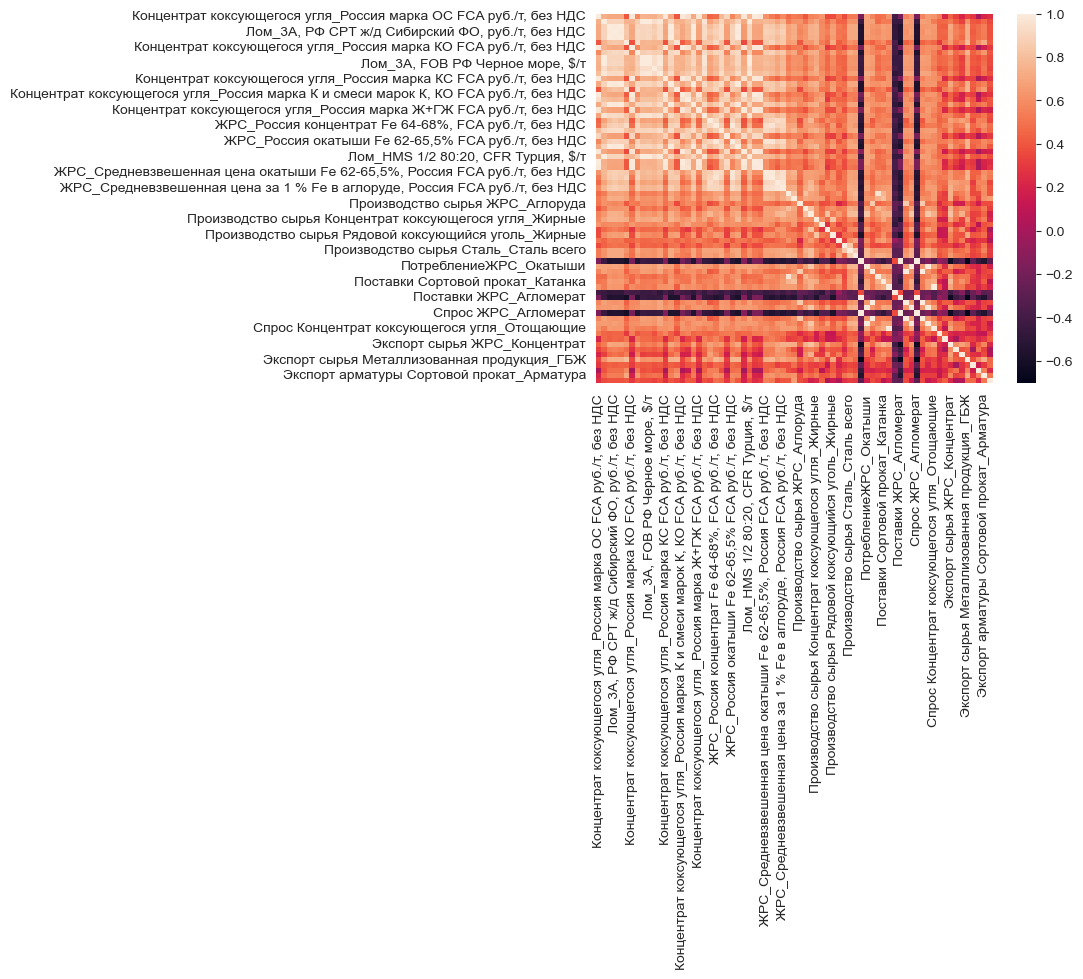

In [4]:
corr = x.corr()
sns.heatmap(corr)

In [5]:
train = pd.read_csv("data/train_refactored_tables.csv")
train

,dt,Цена на арматуру,Концентрат_коксующегося_угля_Россия_среднее_руб_т_без_НДС,"Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС",Лом_3А_руб_т_без_НДС_x,ЖРС_среднее_руб_т_без_НДС_x,"Чугун_Россия, FCA руб./т, без НДС_x","Концентрат коксующегося угля_HCC Австралия, $/t FOB",Лом_среднее_доллар_т,Лом_3А_руб_т_без_НДС_y,ЖРС_среднее_руб_т_без_НДС_y,"Чугун_Россия, FCA руб./т, без НДС_y"
0,2015-03-02,29200,3948.750,6900,12385.000000,2324.666667,21250,103,230.0,12385.000000,2324.666667,21250
1,2015-03-09,29000,4173.625,8750,12319.666667,2361.333333,15250,103,237.4,12319.666667,2361.333333,15250
2,2015-03-16,28700,4173.625,8750,12259.000000,2361.333333,15250,102,237.4,12259.000000,2361.333333,15250
3,2015-03-23,27800,4173.625,8750,12139.000000,2361.333333,15250,101,237.4,12139.000000,2361.333333,15250
4,2015-03-30,27200,4173.625,8750,12059.000000,2410.000000,15250,98,239.0,12059.000000,2410.000000,15250
...,...,...,...,...,...,...,...,...,...,...,...,...
387,2022-08-01,47500,8598.750,18000,20769.000000,3361.000000,29900,227,336.2,20769.000000,3361.000000,29900
388,2022-08-08,49000,7776.250,14500,23051.666667,3319.333333,23250,220,338.2,23051.666667,3319.333333,23250
389,2022-08-15,47500,7776.250,14500,23503.833333,3319.333333,23250,238,369.8,23503.833333,3319.333333,23250
390,2022-08-22,46500,7776.250,14500,23630.666667,3319.333333,23250,264,374.6,23630.666667,3319.333333,23250


/var/folders/w0/7pl8bw_97tv676fpb5jcz6kh0000gn/T/ipykernel_14416/2529172839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

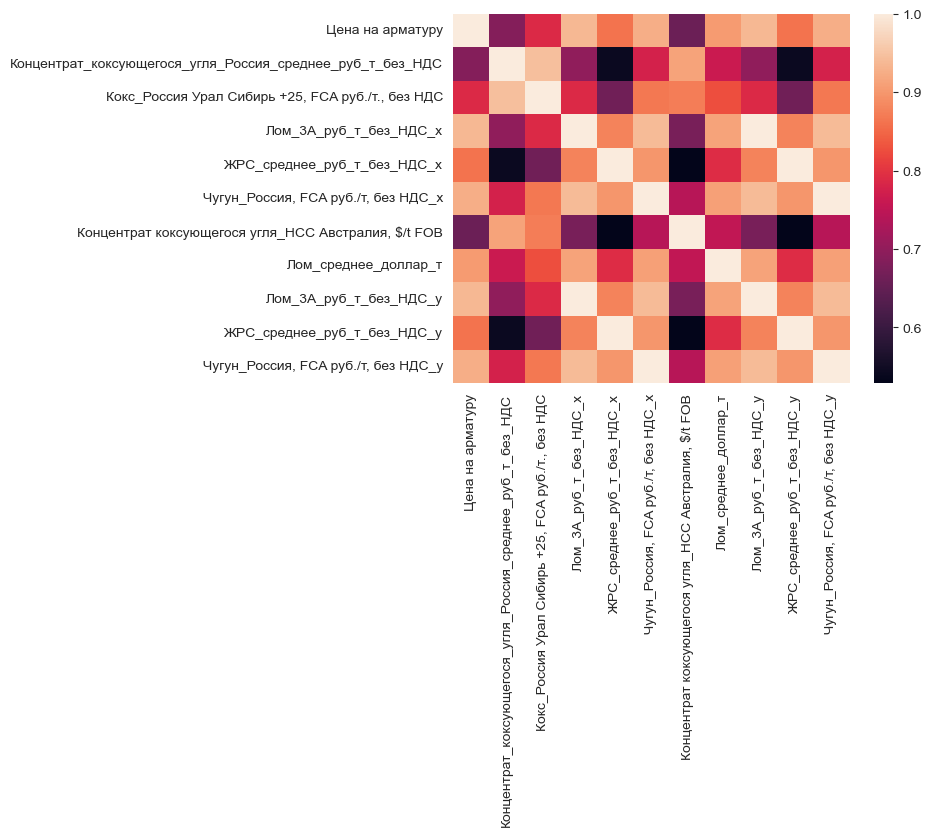

In [6]:
corr = train.corr()
sns.heatmap(corr)

In [7]:
train.drop(["Лом_3А_руб_т_без_НДС_y",
            "ЖРС_среднее_руб_т_без_НДС_y",
            "Чугун_Россия, FCA руб./т, без НДС_y"
            ], axis=1, inplace=True)

In [8]:
train.columns

Index(['dt', 'Цена на арматуру',
       'Концентрат_коксующегося_угля_Россия_среднее_руб_т_без_НДС',
       'Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС',
       'Лом_3А_руб_т_без_НДС_x', 'ЖРС_среднее_руб_т_без_НДС_x',
       'Чугун_Россия, FCA руб./т, без НДС_x',
       'Концентрат коксующегося угля_HCC Австралия, $/t FOB',
       'Лом_среднее_доллар_т'],
      dtype='object')

/var/folders/w0/7pl8bw_97tv676fpb5jcz6kh0000gn/T/ipykernel_14416/2529172839.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


<Axes: >

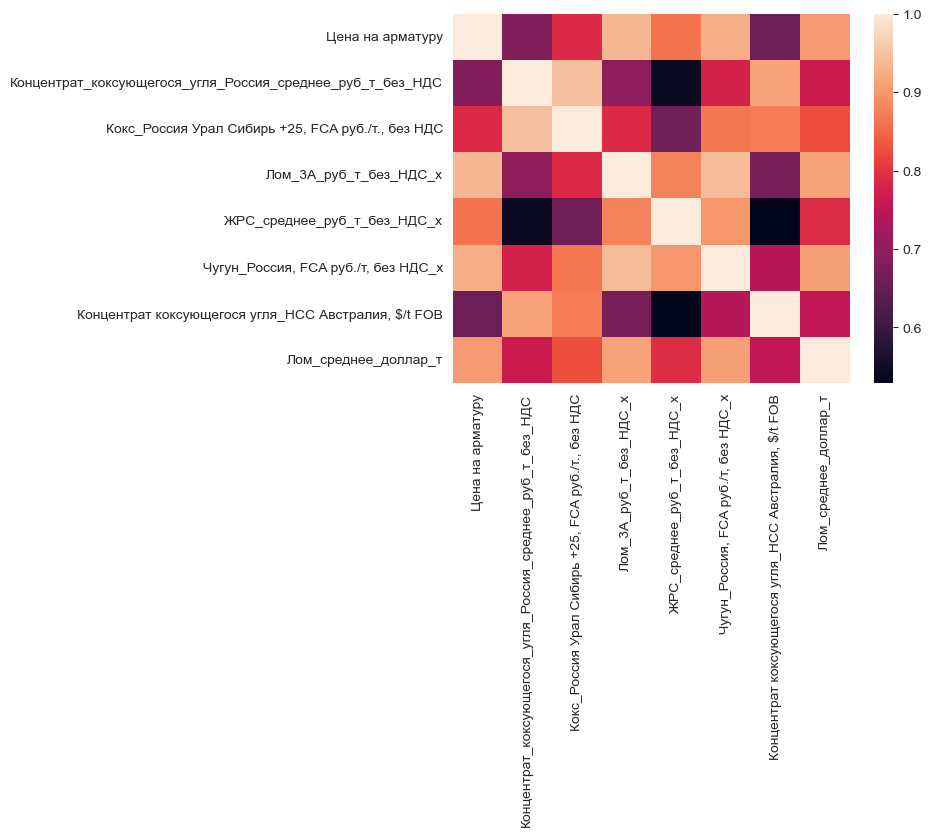

In [9]:
corr = train.corr()
sns.heatmap(corr)

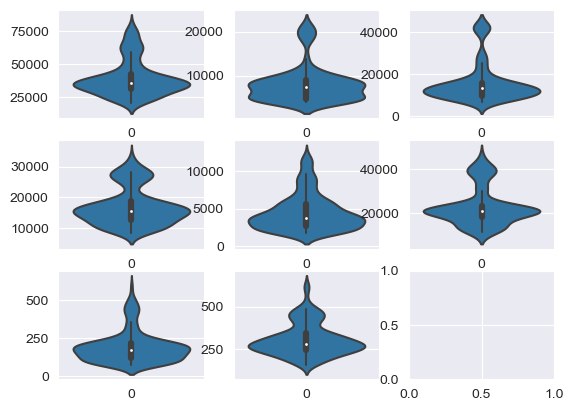

In [10]:
fig, ax_ = plt.subplots(3, 3)
ax = []
for i in ax_:
        ax.extend(i)
for i, col in enumerate(train.columns.drop(["dt"]).tolist()):
    sns.violinplot(data=train[col], ax=ax[i])
plt.show()

In [11]:
test = pd.read_csv("data/test_refactored_tables.csv")
test.columns

Index(['dt', 'Цена на арматуру',
       'Концентрат_коксующегося_угля_Россия_среднее_руб_т_без_НДС',
       'Кокс_Россия Урал Сибирь +25, FCA руб./т., без НДС',
       'Лом_3А_руб_т_без_НДС_x', 'ЖРС_среднее_руб_т_без_НДС_x',
       'Чугун_Россия, FCA руб./т, без НДС_x',
       'Концентрат коксующегося угля_HCC Австралия, $/t FOB',
       'Лом_среднее_доллар_т', 'Лом_3А_руб_т_без_НДС_y',
       'ЖРС_среднее_руб_т_без_НДС_y', 'Чугун_Россия, FCA руб./т, без НДС_y'],
      dtype='object')

In [12]:
test.drop(["Лом_3А_руб_т_без_НДС_y",
            "ЖРС_среднее_руб_т_без_НДС_y",
            "Чугун_Россия, FCA руб./т, без НДС_y"
            ], axis=1, inplace=True)

In [13]:
X_train = train.drop(["dt", "Цена на арматуру"], axis=1)
y_train = train["Цена на арматуру"]
X_test = test.drop(["dt", "Цена на арматуру"], axis=1)
y_test = test["Цена на арматуру"]

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [15]:
model_1 = CatBoostRegressor()
model_1.fit(x_train, y_train)
prediction = model_1.predict(x_test)
print("Catboost metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

Learning rate set to 0.035312
0:	learn: 13112.2294131	total: 57.9ms	remaining: 57.9s
1:	learn: 12763.4239616	total: 58.5ms	remaining: 29.2s
2:	learn: 12405.6184417	total: 59ms	remaining: 19.6s
3:	learn: 12067.3941629	total: 59.5ms	remaining: 14.8s
4:	learn: 11727.7020943	total: 60ms	remaining: 11.9s
5:	learn: 11410.1665788	total: 60.5ms	remaining: 10s
6:	learn: 11108.0862982	total: 61.2ms	remaining: 8.69s
7:	learn: 10820.4283342	total: 61.8ms	remaining: 7.66s
8:	learn: 10545.0719806	total: 62.4ms	remaining: 6.87s
9:	learn: 10299.5064230	total: 62.9ms	remaining: 6.22s
10:	learn: 10029.8482032	total: 64ms	remaining: 5.75s
11:	learn: 9758.6723926	total: 64.5ms	remaining: 5.31s
12:	learn: 9498.2775441	total: 65ms	remaining: 4.94s
13:	learn: 9247.1268686	total: 65.6ms	remaining: 4.62s
14:	learn: 9029.2006663	total: 66.2ms	remaining: 4.35s
15:	learn: 8814.1689481	total: 66.9ms	remaining: 4.11s
16:	learn: 8603.5356480	total: 67.4ms	remaining: 3.9s
17:	learn: 8409.4683920	total: 67.8ms	remaini

In [16]:
model_2 = LGBMRegressor(n_estimators=125, num_leaves=12)
model_2.fit(x_train, y_train)
prediction = model_2.predict(x_test)
print("LGBM metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

LGBM metrics:
MAPE:  0.029495022440606693  %
R2-score:  0.8027862736621446


In [17]:
model_3 = XGBRegressor()
model_3.fit(x_train, y_train)
prediction = model_3.predict(x_test)
print("LGBM metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

LGBM metrics:
MAPE:  0.06053246785868057  %
R2-score:  0.07432704359102771


In [18]:
model_4 = BaggingRegressor()
model_4.fit(x_train, y_train)
prediction = model_4.predict(x_test)
print("BaggingRegressor metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

BaggingRegressor metrics:
MAPE:  0.04981591172907993  %
R2-score:  0.4329511576718398


In [19]:
model_5 = LinearRegression()
model_5.fit(x_train, y_train)
prediction = model_5.predict(x_test)
print("LinearRegression metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

LinearRegression metrics:
MAPE:  0.02966562898299272  %
R2-score:  0.7715685333168341


In [20]:
model_6 = RidgeCV()
model_6.fit(x_train, y_train)
prediction = model_6.predict(x_test)
print("RidgeCV metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

RidgeCV metrics:
MAPE:  0.02951277191287083  %
R2-score:  0.7638095710967864


In [21]:
model_7 = LassoCV()
model_7.fit(x_train, y_train)
prediction = model_7.predict(x_test)
print("LassoCV metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

LassoCV metrics:
MAPE:  0.036184080083226704  %
R2-score:  0.6757273173561298


In [28]:
lgbm_dict = {'learning_rate': 0.065, 'num_leaves': 12, 'colsample_bytree': 0.8460816072186713, 'n_estimators':125,
             }
lgbm = LGBMRegressor(**lgbm_dict)
lgbm.fit(x_train, y_train)
prediction = lgbm.predict(x_test)
print("LGBM metrics:")
print("MAPE: ", mean_absolute_percentage_error(y_test, prediction), " %")
print("R2-score: ", r2_score(y_test, prediction))

LGBM metrics:
MAPE:  0.029139982827825435  %
R2-score:  0.8029968899547442
